📊 Exploratory Data Analysis (EDA)

In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn jupyterlab ipykernel

  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached jupyterlab-4.5.0-py3-none-any.whl.metadata (16 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.0-cp312-cp312-win_amd64.whl.metadata (115 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cach


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd

train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

train.head()
train.info()
train.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Age often missing (systematically, e.g., for poorer passengers?) Check correlation of missing values with passenger class.

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Survival rate: overall  
Survival: No = 0, Yes = 1

In [9]:
train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Survival rate: by sex

In [10]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate: by passenger class

In [11]:
train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate: by point of departure  
Values: C = Cherbourg, Q = Queenstown, S = Southampton

In [12]:
train.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Survival rate: by Age

In [14]:
train["Age"].describe()
train[['Age', 'Survived']].groupby(pd.cut(train["Age"], bins=8), observed=True).mean()

,Age,Survived
Age,,
"(0.34, 10.368]",4.268281,0.593750
"(10.368, 20.315]",17.317391,0.382609
"(20.315, 30.263]",25.423913,0.365217
"(30.263, 40.21]",35.051613,0.445161
"(40.21, 50.158]",45.372093,0.383721
"(50.158, 60.105]",54.892857,0.404762
"(60.105, 70.052]",63.882353,0.235294
"(70.052, 80.0]",73.300000,0.200000


Survival rate: by Fare

In [16]:
train["Fare"].describe()
train[['Fare', 'Survived']].groupby(pd.qcut(train["Fare"], 8), observed=True).mean()

,Fare,Survived
Fare,,
"(-0.001, 7.75]",6.548395,0.207143
"(7.75, 7.91]",7.853554,0.180723
"(7.91, 9.841]",8.438851,0.198198
"(9.841, 14.454]",12.298785,0.407080
"(14.454, 24.479]",18.598823,0.436364
"(24.479, 31.0]",27.379426,0.473214
"(31.0, 69.488]",46.149624,0.481818
"(69.488, 512.329]",130.446687,0.678571


Survival rate: created a FamilySize variable

In [17]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train.groupby("FamilySize")["Survived"].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

Survival rate: extracted Titles from Name, a common feature-engineering trick.

In [18]:
train["Title"] = train["Name"].str.extract(r',\s*([^\.]*)\s*\.')

train.groupby("Title")["Survived"].mean().sort_values(ascending=False)

Title
Lady            1.000000
Ms              1.000000
Sir             1.000000
Mme             1.000000
the Countess    1.000000
Mlle            1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Major           0.500000
Col             0.500000
Dr              0.428571
Mr              0.156673
Capt            0.000000
Jonkheer        0.000000
Don             0.000000
Rev             0.000000
Name: Survived, dtype: float64

Survival rate: by deck (Cabin is mostly missing, but extract the deck)

In [19]:
train["Deck"] = train["Cabin"].str[0]
train.groupby("Deck")["Survived"].mean()

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

Survival rate: sex + passenger class

In [21]:
train.pivot_table(values="Survived", index="Sex", columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Survival rate: age bin + sex

In [23]:
train["AgeBand"] = pd.cut(train["Age"], 5)
train.pivot_table(values="Survived", index="Sex", columns="AgeBand", observed=True)

AgeBand,"(0.34, 16.336]","(16.336, 32.252]","(32.252, 48.168]","(48.168, 64.084]","(64.084, 80.0]"
Sex,,,,,
female,0.673469,0.733333,0.794118,0.916667,NaN
male,0.431373,0.176991,0.183333,0.177778,0.090909


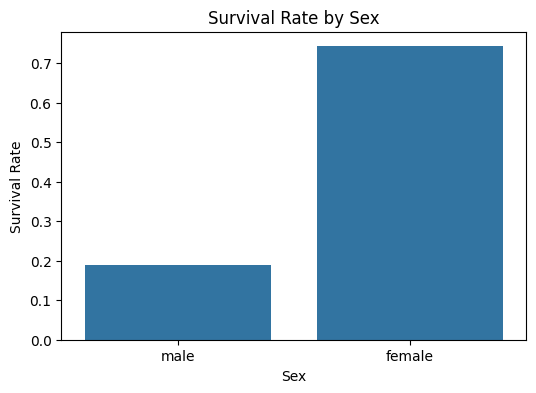

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=train, x="Sex", y="Survived", errorbar=None)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

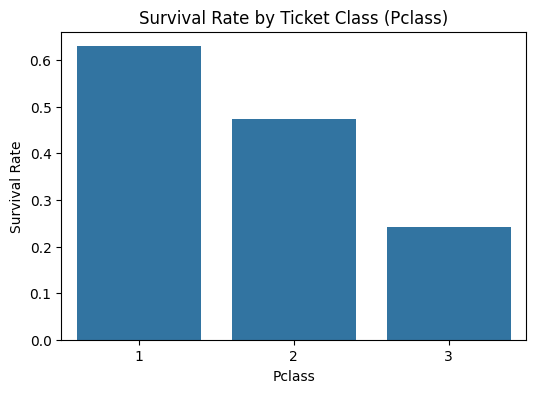

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(data=train, x="Pclass", y="Survived", errorbar=None)
plt.title("Survival Rate by Ticket Class (Pclass)")
plt.ylabel("Survival Rate")
plt.show()

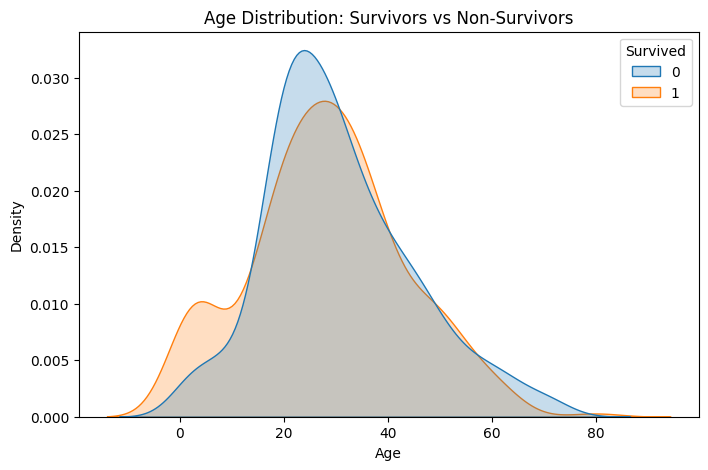

In [26]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=train, x="Age", hue="Survived", common_norm=False, fill=True)
plt.title("Age Distribution: Survivors vs Non-Survivors")
plt.xlabel("Age")
plt.show()

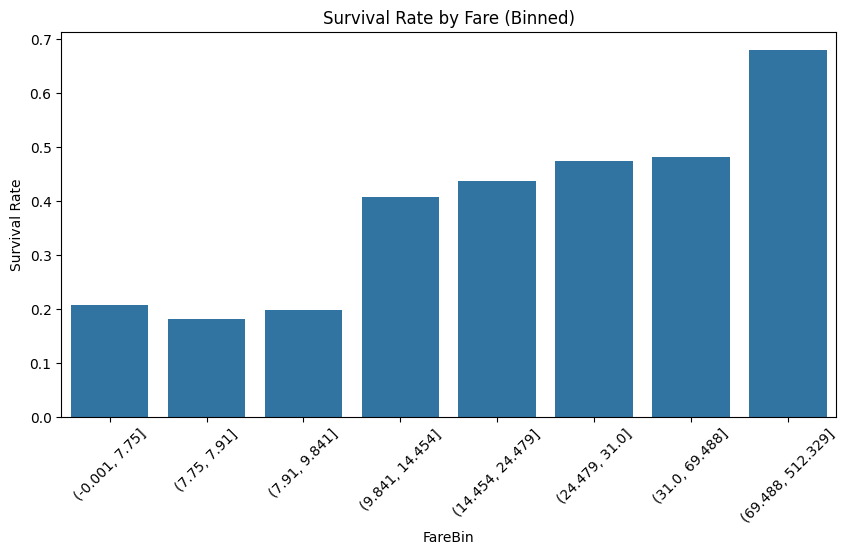

In [31]:
train["FareBin"] = pd.qcut(train["Fare"], 8)

plt.figure(figsize=(10,5))
sns.barplot(data=train, x="FareBin", y="Survived", errorbar=None)
plt.title("Survival Rate by Fare (Binned)")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.show()

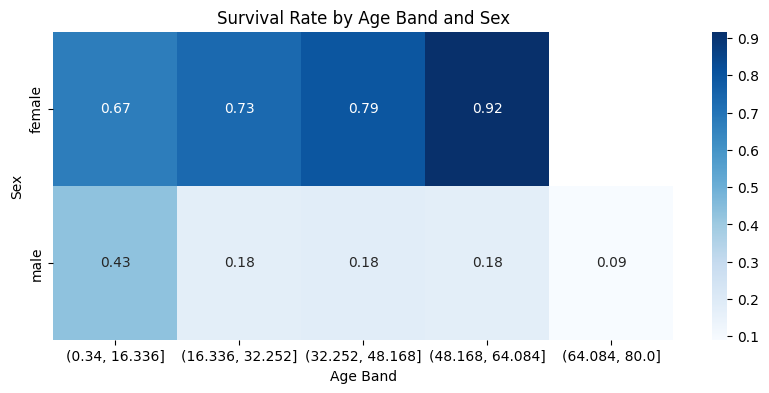

In [33]:
# Create same age bins used in EDA (5 bins)
train["AgeBand"] = pd.cut(train["Age"], 5)

pivot = train.pivot_table(values="Survived", index="Sex", columns="AgeBand", observed=False)

plt.figure(figsize=(10,4))
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Survival Rate by Age Band and Sex")
plt.ylabel("Sex")
plt.xlabel("Age Band")
plt.show()